In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

Mounted at /content/drive


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-11 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


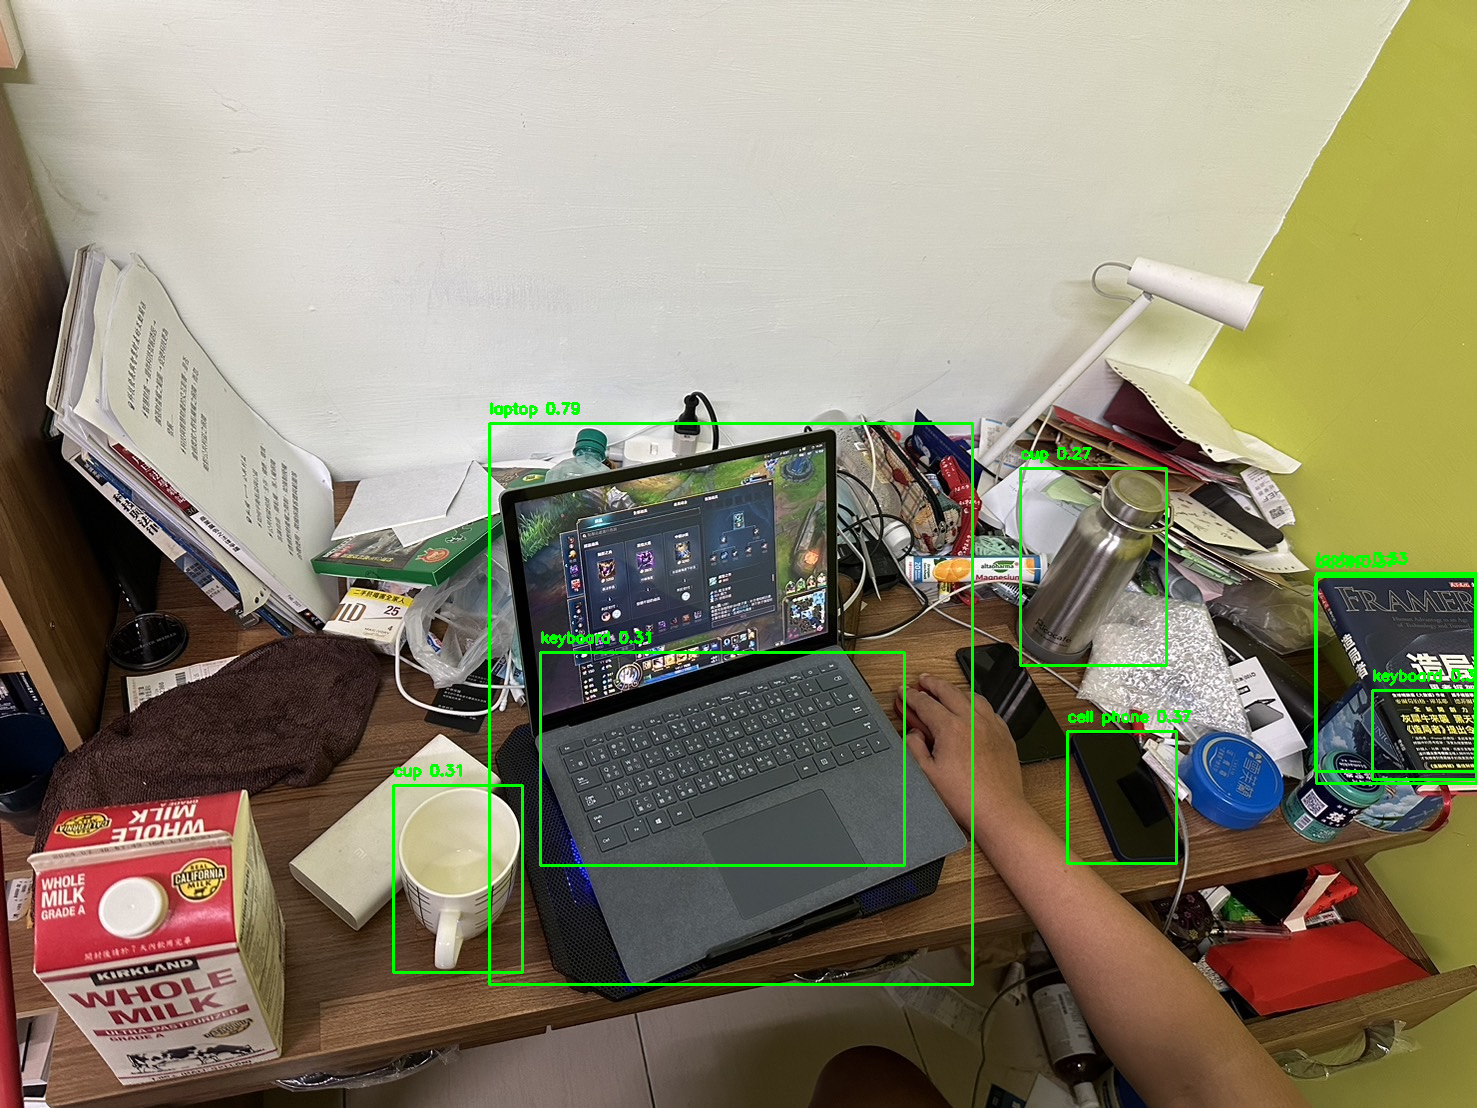

In [ ]:
import torch

image = cv2.imread('drive/Othercomputers/我的 筆記型電腦/ppt/大四下/專題/img/desk.jpg')
if image is None:
    print("Could not read the image.")
    exit(1)

# preprocessing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

# 使用YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
results = model(image)

detections = results.pandas().xyxy[0]

for index, row in detections.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    label = f"{row['name']} {row['confidence']:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(image)
